# Data Visualization and Exploration
## Exploring data with Seaborn Plots

In [2]:
import os
import glob
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import Phylo
import numpy as numpy
import matplotlib
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[Drosophila Melanogaster Genome](https://www.kaggle.com/mylesoneill/drosophila-melanogaster-genome/kernels)

In [3]:
#get path to data
file_csv = glob.glob(os.path.join(os.getcwd(),'gene_data') + '/*.csv') #filepath to csv data
file_fa = glob.glob(os.path.join(os.getcwd(),'gene_data') + '/*.fa') #filepath to fa

In [4]:
file_csv;

In [5]:
file_fa;

## one variable shown four different ways...

Taking a look at the base pairs from the file 'mrna-refseq.fa'. This file contains mRNA sequences from the fruit fly, and these sequences eventually code from proteins.


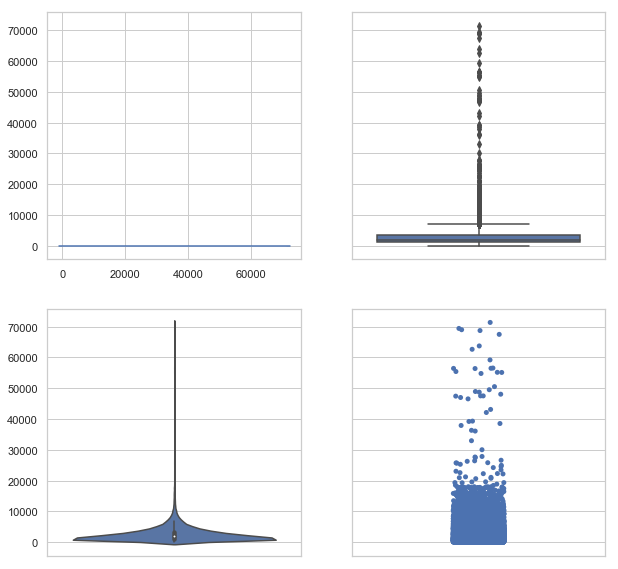

In [286]:
fig, axr = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10,10))

sns.distplot(base_pair_size, ax=axr[0,0])
sns.boxplot(y=base_pair_size, ax=axr[0,1])
sns.violinplot(y=base_pair_size, ax=axr[1,0])
sns.stripplot(y=base_pair_size, ax=axr[1,1])

plt.show()

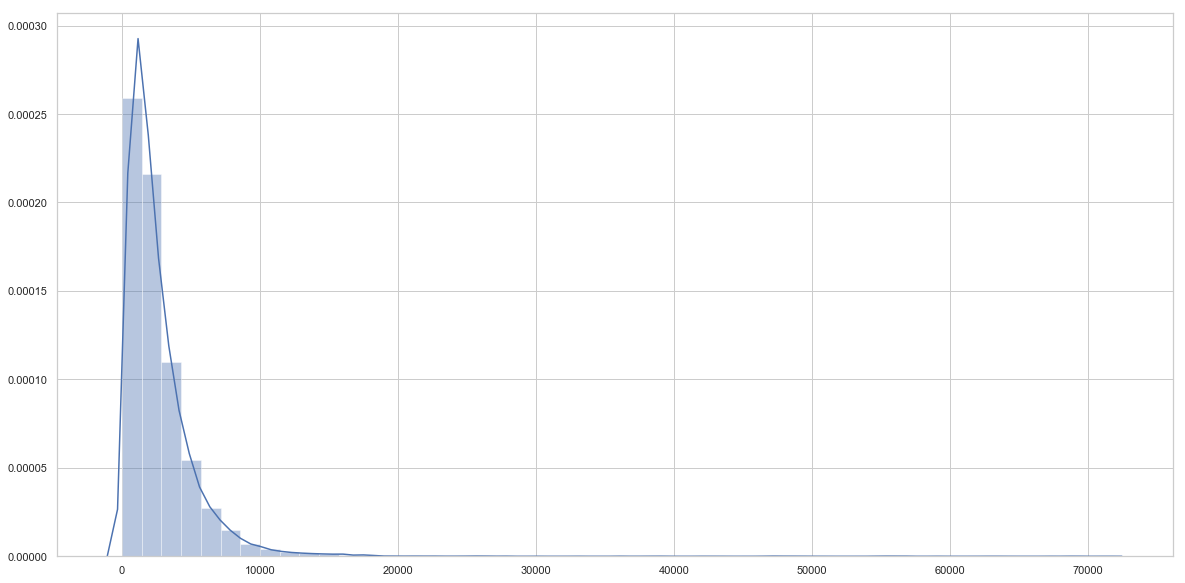

In [41]:
#1. histogram showing distribution of mRNA sequences

sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
base_pair_size = [len(record) for record in SeqIO.parse(file[2], "fasta")]
sns.despine(offset=10, trim=True)
sns.distplot(base_pair_size, ax=ax[0])

plt.show()

# continuous variables

[resturant dataset](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)

In [153]:
restaurants = pd.read_csv('zomato.csv'); restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [155]:
restaurants.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [161]:
online_orders = pd.DataFrame(restaurants.online_order.value_counts()); online_orders

online_order
Yes         30444
No          21273

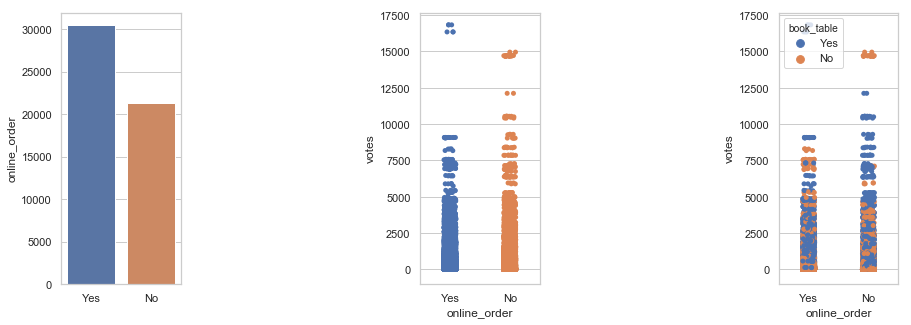

In [305]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
fig.subplots_adjust(wspace=2)


sns.barplot(x=online_orders.index, y=online_orders['online_order'], ax=ax[0])
sns.stripplot(x='online_order', y='votes', data=restaurants, ax=ax[1])
sns.stripplot(x='online_order', y='votes', hue='book_table', data=restaurants, ax=ax[2])


plt.show()

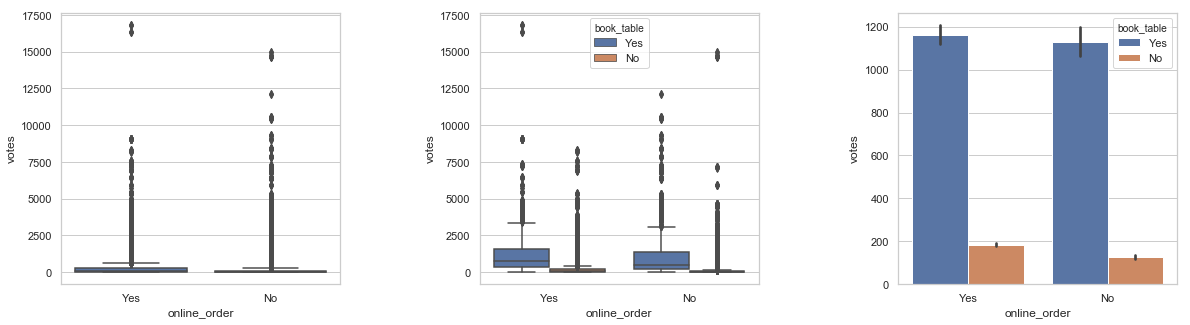

In [310]:
fig, ax = plt.subplots(figsize=(20,5), ncols=3, nrows=1)
fig.subplots_adjust(wspace=.5)


sns.boxplot(x='online_order', y='votes', data=restaurants, ax=ax[0])
sns.boxplot(x='online_order', y='votes', hue='book_table', data=restaurants, ax=ax[1])
sns.barplot(x='online_order', y='votes', hue='book_table', data=restaurants, ax=ax[2])


plt.show()

# S&P 500 data

In [344]:
import pandas_datareader as pdr
from datetime import datetime

In [391]:
#Setting the end date to today
end = datetime(2018, 4, 18)

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [392]:
end.date()

datetime.date(2018, 4, 18)

In [455]:
stocks = pd.read_csv('history_60d.csv')

In [456]:
aapl = stocks[stocks['symbol']=='AAPL'].set_index('date')
goog = stocks[stocks['symbol']=='GOOG'].set_index('date')
amzn = stocks[stocks['symbol']=='AMZN'].set_index('date')
nflx = stocks[stocks['symbol']=='NFLX'].set_index('date')

aapl.head()

symbol    volume        open       close        high         low  \
date                                                                          
2019-04-18   AAPL  24195800  203.119995  203.860001  204.149994  202.520004   
2019-04-17   AAPL  28906800  199.539993  203.130005  203.380005  198.610001   
2019-04-16   AAPL  25696400  199.460007  199.250000  201.369995  198.559998   
2019-04-15   AAPL  17536600  198.580002  199.229996  199.850006  198.009995   
2019-04-12   AAPL  27760700  199.199997  198.869995  200.139999  196.210007   

              adjclose  
date                    
2019-04-18  203.860001  
2019-04-17  203.130005  
2019-04-16  199.250000  
2019-04-15  199.229996  
2019-04-12  198.869995

In [457]:
aapl.index = pd.to_datetime(aapl.index)
goog.index = pd.to_datetime(goog.index)
amzn.index = pd.to_datetime(amzn.index)
nflx.index = pd.to_datetime(nflx.index)

In [458]:
aapl_year = aapl[(aapl.index.get_level_values(0) <= '2019-04-18 07:00:00') \
             & (aapl.index.get_level_values(0) >= '2018-04-18 00:00:00')]

goog_year = goog[(goog.index.get_level_values(0) <= '2019-04-18 07:00:00') \
             & (goog.index.get_level_values(0) >= '2018-04-18 00:00:00')]

amzn_year = goog[(amzn.index.get_level_values(0) <= '2019-04-18 07:00:00') \
             & (amzn.index.get_level_values(0) >= '2018-04-18 00:00:00')]

nflx_year = goog[(nflx.index.get_level_values(0) <= '2019-04-18 07:00:00') \
             & (nflx.index.get_level_values(0) >= '2018-04-18 00:00:00')]

In [459]:
aapl_year['Daily Return'] = aapl['adjclose'].pct_change()
goog_year['Daily Return'] = goog['adjclose'].pct_change()
amzn_year['Daily Return'] = amzn['adjclose'].pct_change()
nflx_year['Daily Return'] = nflx['adjclose'].pct_change()

In [460]:
close_df = pd.concat([aapl_year['Daily Return'], goog_year['Daily Return'],\
           amzn_year['Daily Return'], nflx_year['Daily Return'] ], axis=1).dropna()


In [461]:
close_df.columns = ['AAPL','GOOG','AMZN','NFLX']
close_df.head()

AAPL      GOOG      AMZN      NFLX
date                                              
2019-04-17 -0.003581 -0.000024  0.001681 -0.015568
2019-04-16 -0.019101 -0.007449 -0.000954  0.013306
2019-04-15 -0.000100 -0.004914 -0.009753 -0.029461
2019-04-12 -0.001807 -0.002645 -0.000981  0.006507
2019-04-11  0.000402 -0.010880  0.000548  0.047018

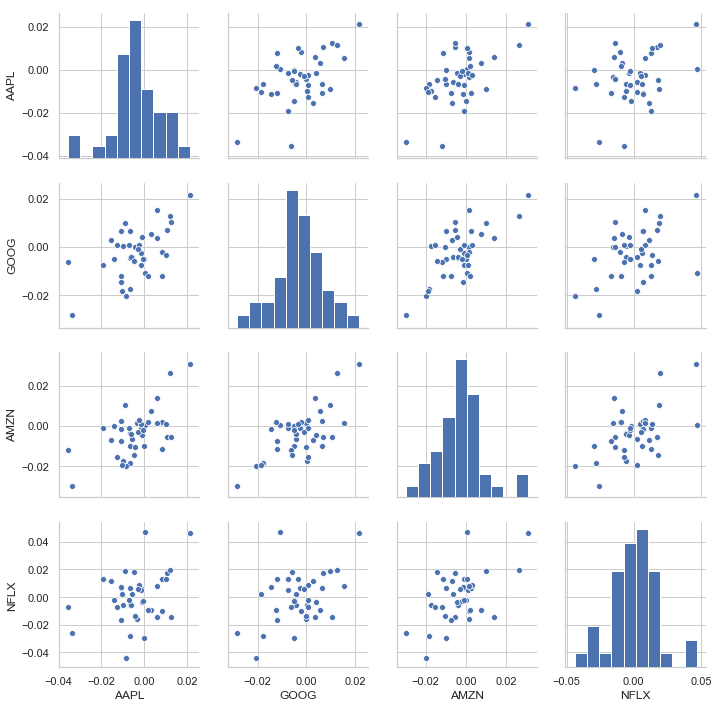

In [462]:
sns.pairplot(close_df)

In [467]:
close_df_corr = close_df.corr()

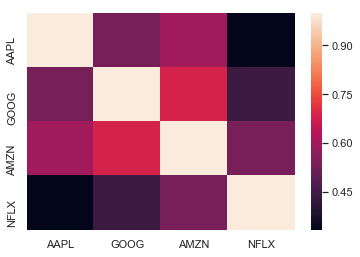

In [468]:
sns.heatmap(close_df_corr)